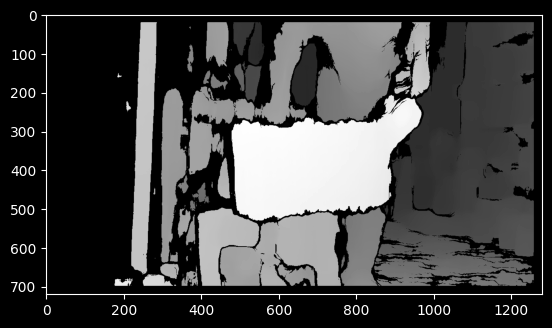

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
#imgL = cv2.imread('./data/tsukuba_l.png',0)
#imgR = cv2.imread('./data/tsukuba_r.png',0)
imgL =  cv2.imread('./scenes/left/leftImage_640x480_05.png', 0)
imgR = cv2.imread('./scenes/right/rightImage_640x480_05.png', 0)
stereo = cv2.StereoBM_create(numDisparities=0, blockSize=43)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

In [2]:
import cv2
from matplotlib import pyplot as plt
import pickle

OPTIMIZE_ALPHA = 0.25
imageSize = (1280, 720)
#tosave = pickle.dumps(cal_data) #json.dumps(cal_data)
f = open("./calib_data/stereoCalibdata.dat","rb")
rd =  pickle.load(f) #f.read()
f.close()
print(rd)

{'M1': array([[587.67516492,   0.        , 678.61673352],
       [  0.        , 588.40250252, 314.98216283],
       [  0.        ,   0.        ,   1.        ]]), 'M2': array([[591.92757888,   0.        , 673.01330026],
       [  0.        , 592.36675529, 317.65004567],
       [  0.        ,   0.        ,   1.        ]]), 'dist1': array([[-0.04394512,  0.00445412, -0.01537472,  0.01090104, -0.00342373]]), 'dist2': array([[-0.0492279 ,  0.03455273, -0.01396118,  0.00983154, -0.03078213]]), 'rvecs1': (array([[ 0.00455705],
       [-0.1971804 ],
       [ 3.03965216]]), array([[-0.04112781],
       [ 0.13681558],
       [ 3.04013722]]), array([[-1.39362086],
       [-0.0853794 ],
       [-2.82150656]]), array([[ 0.89138763],
       [ 0.19081219],
       [-2.94064631]]), array([[-0.24107587],
       [-0.06072178],
       [ 3.08864794]]), array([[1.18071838],
       [0.04956924],
       [2.73637362]]), array([[ 0.88709141],
       [ 0.53607909],
       [-2.71855821]]), array([[-0.46924942],
 

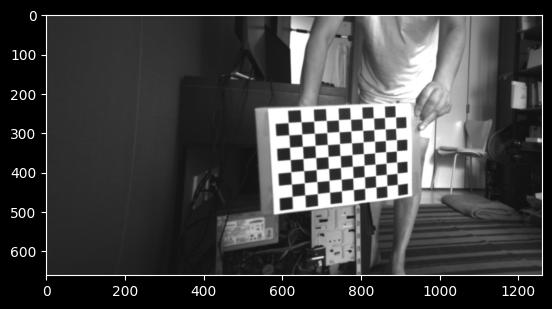

In [3]:
(leftRectification, rightRectification, leftProjection, rightProjection,
        dispartityToDepthMap, leftROI, rightROI) = cv2.stereoRectify(
                rd['M1'], rd['dist1'],
                rd['M2'], rd['dist2'],
                imageSize, rd['R'], rd['T'],
                None, None, None, None, None,
                cv2.CALIB_ZERO_DISPARITY, OPTIMIZE_ALPHA)

leftMapX, leftMapY = cv2.initUndistortRectifyMap(
        rd['M1'], rd['dist1'], leftRectification,
        leftProjection, imageSize, cv2.CV_32FC1)

rightMapX, rightMapY = cv2.initUndistortRectifyMap(
        rd['M2'], rd['dist2'], rightRectification,
        rightProjection, imageSize, cv2.CV_32FC1)

img_l = cv2.imread('./scenes/left/leftImage_640x480_05.png')
img_r = cv2.imread('./scenes/right/rightImage_640x480_05.png')
#cv2.imshow('left', img_l)
#cv2.waitKey(0)
#cv2.destroyWindow('left')
imgR_gray = cv2.cvtColor(img_r,cv2.COLOR_BGR2GRAY)
imgL_gray = cv2.cvtColor(img_l,cv2.COLOR_BGR2GRAY)


fixedLeft = cv2.remap(imgL_gray, leftMapX, leftMapY, cv2.INTER_LINEAR, cv2.BORDER_CONSTANT,0)
lx,ly,lw,lh = leftROI
dstL = fixedLeft[ly:ly+lh, lx:lx+lw]
fixedRight = cv2.remap(imgR_gray, rightMapX, rightMapY, cv2.INTER_LINEAR, cv2.BORDER_CONSTANT,0)
rx,ry,rw,rh = rightROI
dstR = fixedRight[ry:ry+rh, rx:rx+rw]

plt.imshow(cv2.cvtColor(dstL, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(dstR, cv2.COLOR_BGR2RGB))
plt.show()

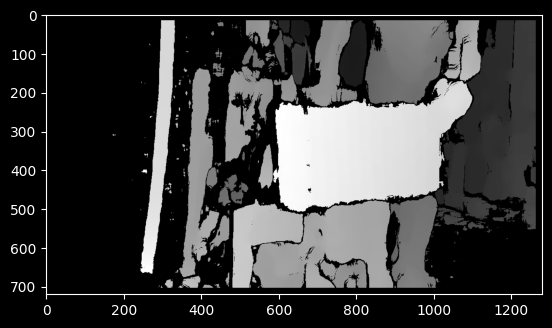

In [4]:
DEPTH_VISUALIZATION_SCALE = 2048

stereoMatcher = cv2.StereoBM_create(numDisparities=0, blockSize=33)

disparity = stereoMatcher.compute(fixedLeft, fixedRight)
#local_max = disparity.max()
#local_min = disparity.min()
#disparity_grayscale = (disparity-local_min)*(65535.0/(local_max-local_min))
#disparity_fixtype = cv2.convertScaleAbs(disparity_grayscale, alpha=(255.0/65535.0))
#disparity_color = cv2.applyColorMap(disparity_fixtype, cv2.COLORMAP_JET)

plt.imshow(disparity, 'gray')#cv2.cvtColor(disparity, cv2.COLOR_BGR2RGB))
plt.show()

#cv2.imshow('depth', depth / DEPTH_VISUALIZATION_SCALE)
#if cv2.waitKey(1) & 0xFF == ord('q'):
#    cv2.destroyAllWindows()

In [4]:
f = open("./calib_data/stereoCalibdata.dat","rb")
rd =  pickle.load(f) #f.read()
f.close()

(leftRectification, rightRectification, leftProjection, rightProjection,
        dispartityToDepthMap, leftROI, rightROI) = cv2.stereoRectify(
                rd['M1'], rd['dist1'],
                rd['M2'], rd['dist2'],
                imageSize, rd['R'], rd['T'],
                None, None, None, None, None,
                cv2.CALIB_ZERO_DISPARITY, OPTIMIZE_ALPHA)

leftMapX, leftMapY = cv2.initUndistortRectifyMap(
        rd['M1'], rd['dist1'], leftRectification,
        leftProjection, imageSize, cv2.CV_32FC1)

rightMapX, rightMapY = cv2.initUndistortRectifyMap(
        rd['M2'], rd['dist2'], rightRectification,
        rightProjection, imageSize, cv2.CV_32FC1)

webcam = cv2.VideoCapture(1)
webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 2560)
webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

stereo = cv2.StereoBM_create(numDisparities=0, blockSize=21) # 16, 15

cv2.namedWindow("Stereo",0)
cv2.resizeWindow("Stereo", 640, 480)
if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
    status, frame = webcam.read()
    frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    if status:
        imgL = frame_gray[0: 0 + 720, 0: 0 + 1280]
        imgR = frame_gray[0: 0 + 720, 1280: 1280 + 1280]
        fixedLeft = cv2.remap(imgL, leftMapX, leftMapY, cv2.INTER_LINEAR, cv2.BORDER_CONSTANT,0)
        fixedRight = cv2.remap(imgR, rightMapX, rightMapY, cv2.INTER_LINEAR, cv2.BORDER_CONSTANT,0)

        disparity = stereo.compute(fixedLeft,fixedRight)
        #norm_image = cv2.normalize(disparity, None, alpha = 0, beta = 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        #cv2.imshow("Stereo", disparity / 255.)

        local_max = disparity.max()
        local_min = disparity.min()
        disparity_grayscale = (disparity-local_min)*(65535.0/(local_max-local_min))
        disparity_fixtype = cv2.convertScaleAbs(disparity_grayscale, alpha=(255.0/65535.0))
        disparity_color = cv2.applyColorMap(disparity_fixtype, cv2.COLORMAP_JET)
        cv2.imshow("Stereo", disparity_color)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()

또다른 테스트를 위해서 동영상에서는 꽤 괜찮은 결과를 얻는걸로 보인다
https://www.youtube.com/watch?v=c7CF6eDC0_A&t=930s
https://github.com/sieuwe1/PS4-eye-camera-for-linux-with-python-and-OpenCV/blob/main/OpenCV_viewer/View_Depth.py



In [8]:
import pyrealsense2 as rs
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pickle
import time

f = open("./calib_data/stereoCalibdata.dat","rb")
rd =  pickle.load(f) #f.read()
f.close()
imageSize = (1280, 720)
OPTIMIZE_ALPHA = 0.25

(leftRectification, rightRectification, leftProjection, rightProjection,
        dispartityToDepthMap, leftROI, rightROI) = cv2.stereoRectify(
                rd['M1'], rd['dist1'],
                rd['M2'], rd['dist2'],
                imageSize, rd['R'], rd['T'],
                None, None, None, None, None,
                cv2.CALIB_ZERO_DISPARITY, OPTIMIZE_ALPHA)

leftMapX, leftMapY = cv2.initUndistortRectifyMap(
        rd['M1'], rd['dist1'], leftRectification,
        leftProjection, imageSize, cv2.CV_32FC1)

kernel= np.ones((13,13),np.uint8)
win_size = 5
min_disp = 10
max_disp = 16 * 2 + 10
num_disp = max_disp - min_disp # Needs to be divisible by 16

#webcam = cv2.VideoCapture(1)
#webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 2560)
#webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)

stereo = cv2.StereoSGBM_create(minDisparity= min_disp,
numDisparities = num_disp,
blockSize = 5,
uniquenessRatio = 10,
speckleWindowSize = 1000,
speckleRange = 10,
disp12MaxDiff = 25,
P1 = 8*3*win_size**2,#8*3*win_size**2,
P2 =32*3*win_size**2) #32*3*win_size**2)

try:
    # Create a context object. This object owns the handles to all connected realsense devices
    pipeline = rs.pipeline()

    # Configure streams
    config = rs.config()
    config.enable_stream(rs.stream.infrared, 1, 1280,720, rs.format.y8, 30)
    config.enable_stream(rs.stream.infrared, 2, 1280,720, rs.format.y8, 30)


    # Start streaming
    pipeline.start(config)



    while True:
        frames = pipeline.wait_for_frames()
        Left_frame = frames.get_infrared_frame(1) # 내가 봤을때 왼쪽
        Right_frame = frames.get_infrared_frame(2)

       

        

        start = time.time()
        if not Left_frame or not Right_frame:
            continue

        Infra_Left_image = np.asanyarray(Left_frame.get_data())
        Infra_Right_image = np.asanyarray(Right_frame.get_data())

        new_w, new_h = Infra_Left_image.shape

        disp = stereo.compute(Infra_Left_image, Infra_Right_image)
        denoised = ((disp.astype(np.float32)/ 16)-min_disp)/num_disp
        dispc= (denoised-denoised.min())*255
        dispC= dispc.astype(np.uint8)     
        
        #denoise step 2
        denoised= cv2.morphologyEx(dispC,cv2.MORPH_CLOSE, kernel)
        
        #apply color map
        disp_Color= cv2.applyColorMap(denoised,cv2.COLORMAP_OCEAN)
        f = 0.3 * 1280                          # 30cm focal length
        Q = np.float32([[1, 0, 0, -0.5*new_w],
                        [0,-1, 0,  0.5*new_h], # turn points 180 deg around x-axis,
                        [0, 0, 0,      f], # so that y-axis looks up
                        [0, 0, 1,      0]])
        points = cv2.reprojectImageTo3D(disp, Q)

        z_values = points[:,:,2]
        z_values = z_values.flatten()
        indices = z_values.argsort()

        precentage = 25280
        min_distance = np.mean(np.take(z_values,indices[0:precentage]))                             # takes the 30% lowest measuerements and gets the average distance from these.
        avg_distance = np.mean(z_values)                                                           # averages all distances
        max_distance = np.mean(np.take(z_values,indices[z_values.shape[0]-precentage:z_values.shape[0]])) # takes the 30% highest measuerements and gets the average distance from these.
        #print(np.take(z_values,indices[z_values.shape[0]-precentage:z_values.shape[0]]))
        #print(np.take(z_values,indices[:-100]))

        #visualize
        cv2.imshow("Depth", disp_Color)
        #left = cv2.resize(imgL,((632, 400)))
        #left = cv2.cvtColor(left, cv2.COLOR_GRAY2BGR)
        #color_depth = cv2.addWeighted(imgL,0.4,disp_Color,0.4,0)

        end = time.time()
        fps = 1 / (end-start)

            #cv2.putText(color_depth, "minimum: " + str(round(min_distance,1)),(5, 20),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),2,cv2.LINE_AA)
            #cv2.putText(color_depth, "average: " + str(round(avg_distance,1)),(5, 40),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),2,cv2.LINE_AA)
            #cv2.putText(color_depth, "maximum: " + str(round(max_distance,1)),(5, 60),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),2,cv2.LINE_AA)
            #cv2.putText(color_depth, "FPS: " + str(round(fps)),(5, 80),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),2,cv2.LINE_AA)

            #cv2.imshow("Stereo", color_depth)

        key = cv2.waitKey(1)

        if key & 0xFF == ord('q') or key == 27:
            cv2.destroyAllWindows()
            break

    exit(0)


except Exception as e:
    print(e)
    pass

finally:
    pipeline.stop()

: 